In [1]:
#EDA includes
#Visualizing survival by gender and age within passenger classes.
#Analyzing the impact of family size on survival.
#Examining the distribution of fares across passenger classes.
#Calculating a correlation matrix to identify potential relationships between variables.
#outlier Detection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings("ignore")

In [3]:
#getting csv files from path
cwd = os.getcwd()
files = os.listdir(cwd)
files = [ f for f in files if f.split('.')[1] == 'csv']
files

['test.csv', 'train.csv']

In [4]:
#Load the datset from kaggle

titanic_data = pd.read_csv('train.csv')

In [5]:
#display basic information about the datset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Data Preprocessing
#handle missing data
titanic_data.dropna(subset=['Embarked'], inplace=True)

In [9]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace=True)

Text(0.5, 1.0, 'Distribution of Age')

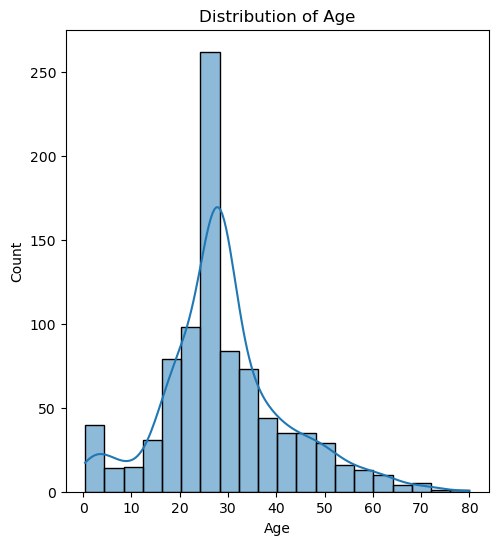

In [11]:
#Exploring the distribution of numerical Variables
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.histplot(data=titanic_data, x ='Age', bins=20, kde=True)
plt.title('Distribution of Age')

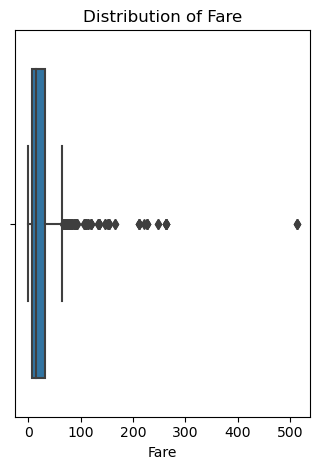

In [12]:
plt.subplot(1, 2, 2)
sns.boxplot(data=titanic_data, x='Fare')
plt.title('Distribution of Fare')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Survival count by passenger Class')

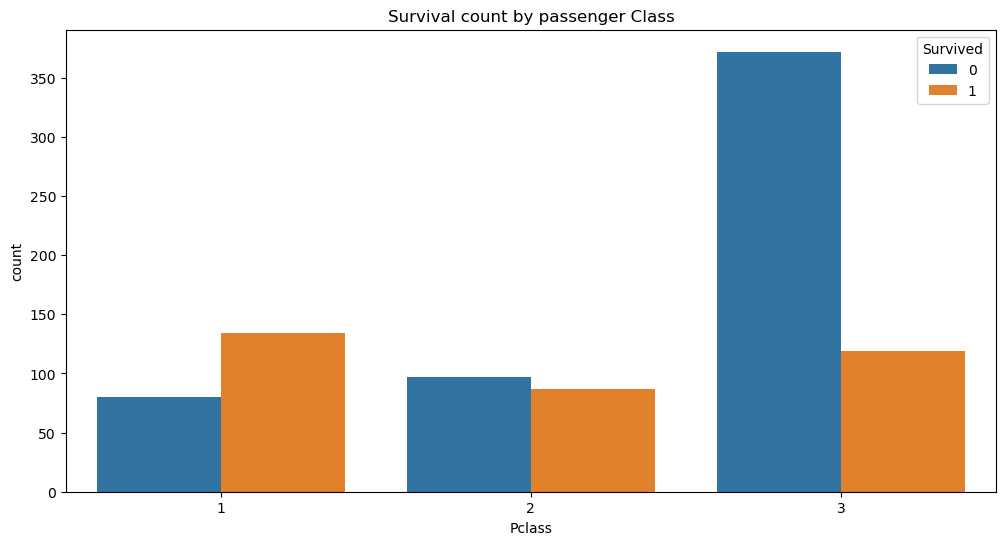

In [13]:
#Visualizing categorical variables
plt.figure(figsize=(12,6))
sns.countplot(data=titanic_data, x='Pclass', hue='Survived')
plt.title('Survival count by passenger Class')

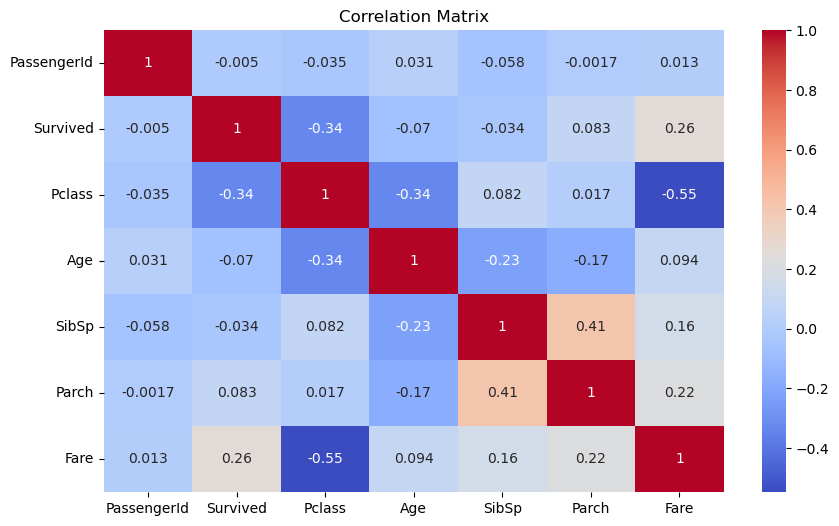

In [14]:
#Correlation analysis
correlation_matrix = titanic_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

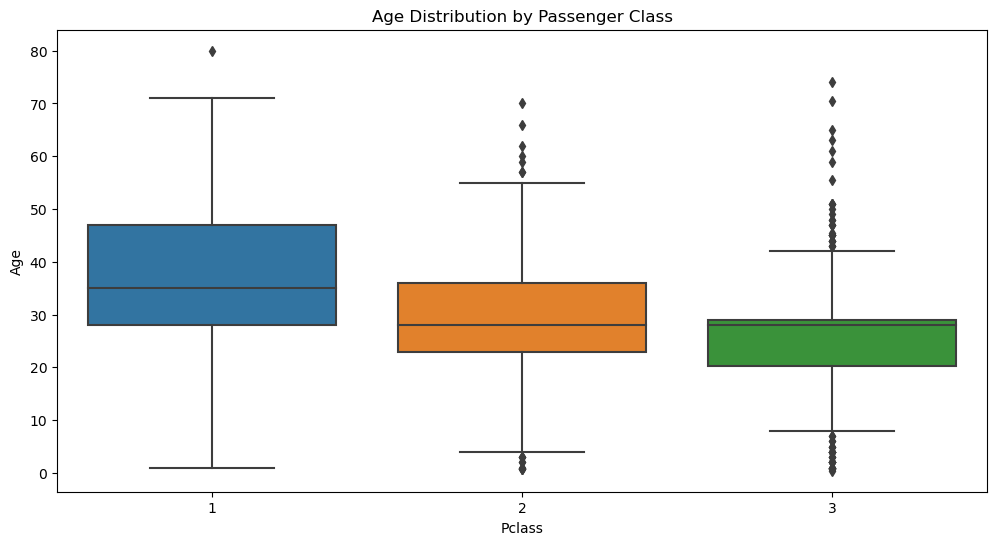

In [15]:
#outlier Detection
plt.figure(figsize=(12,6))
sns.boxplot(data=titanic_data, x ='Pclass', y='Age')
plt.title('Age Distribution by Passenger Class')
plt.show()

In [16]:
#Feature engineering
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

In [17]:
#Insight and Conclusionis
avg_age_survived = titanic_data.groupby('Survived')['Age'].mean()
avg_age_survived

Survived
0    30.028233
1    28.163735
Name: Age, dtype: float64

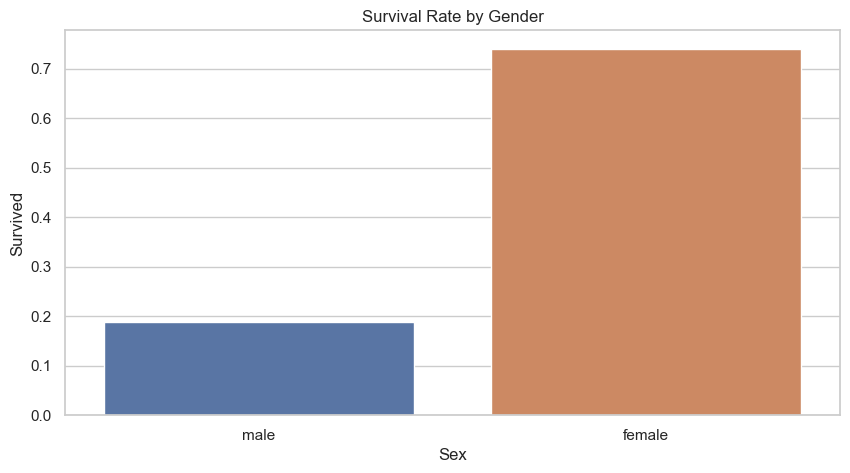

In [18]:
# Visualizing survival by gender
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
sns.barplot(x="Sex", y="Survived", data=titanic_data, ci=None)
plt.title("Survival Rate by Gender")
plt.show()

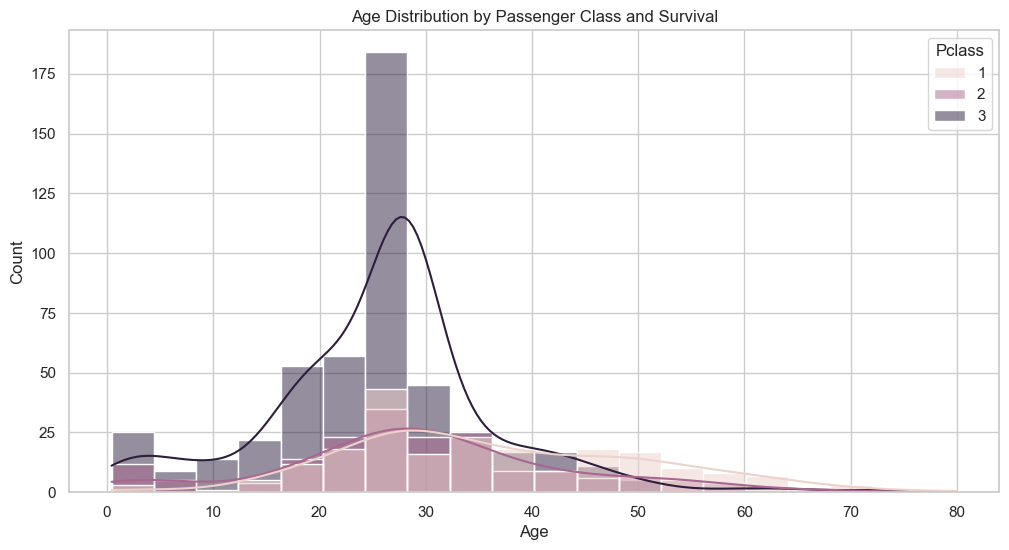

In [19]:
# Visualizing survival by age and class
plt.figure(figsize=(12, 6))
sns.histplot(data=titanic_data, x='Age', hue='Pclass', bins=20, kde=True, common_norm=False)
plt.title('Age Distribution by Passenger Class and Survival')
plt.show()

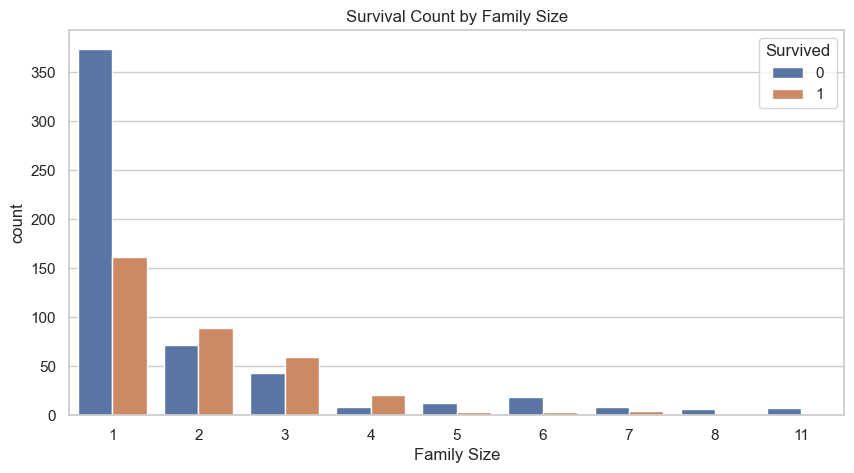

In [20]:
# Survival by family size
plt.figure(figsize=(10, 5))
sns.countplot(data=titanic_data, x='FamilySize', hue='Survived')
plt.title('Survival Count by Family Size')
plt.xlabel('Family Size')
plt.show()

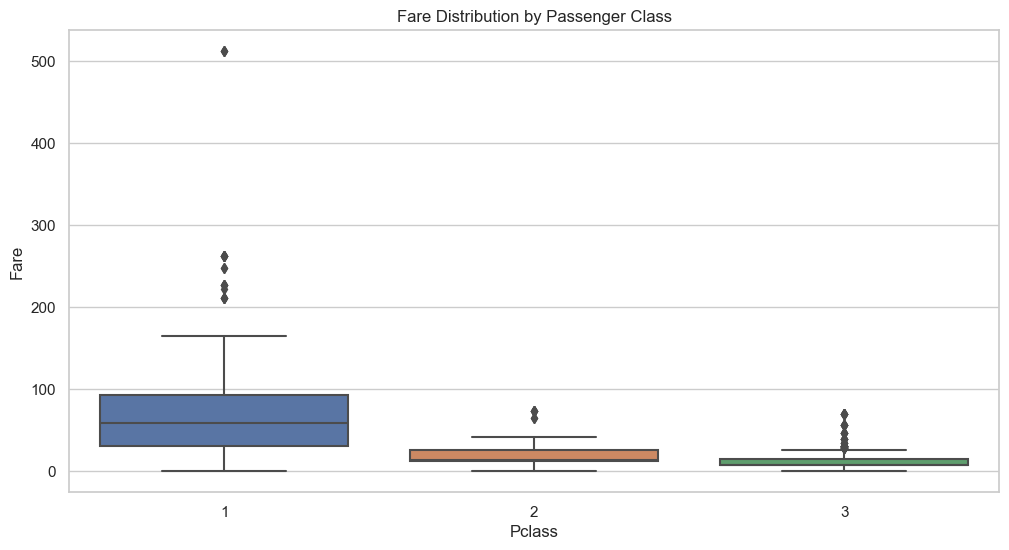

In [21]:
# Fare distribution by class
plt.figure(figsize=(12, 6))
sns.boxplot(data=titanic_data, x='Pclass', y='Fare')
plt.title('Fare Distribution by Passenger Class')
plt.show()